In [85]:
import numpy as np #Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [86]:
# dataset_path="/kaggle/input/e-commerce-dataset/ecommerce_dataset_updated.csv"
df=pd.read_csv("/kaggle/input/e-commerce-dataset/ecommerce_dataset_updated.csv")# Downloading the dataset

In [87]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [88]:
df.isnull().sum() #Number of total null observations

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

There are no null observations present in the dataset

In [89]:
df["Category"].unique() #Total values of Category column

array(['Sports', 'Clothing', 'Toys', 'Beauty', 'Books', 'Home & Kitchen',
       'Electronics'], dtype=object)

In [90]:
df["Payment_Method"].unique() #Total values of Payement method column

array(['Net Banking', 'Credit Card', 'UPI', 'Cash on Delivery',
       'Debit Card'], dtype=object)

In [91]:
df["User_ID"].unique()

array(['337c166f', 'd38a19bf', 'd7f5f0b0', ..., '1defd3b1', '0611293d',
       'e73ad07c'], dtype=object)

In [92]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [93]:
df["Price (Rs.)"].describe()

count    3660.000000
mean      254.800675
std       141.682621
min        10.090000
25%       134.012500
50%       253.845000
75%       377.595000
max       499.960000
Name: Price (Rs.), dtype: float64

In [94]:
df["Final_Price(Rs.)"].describe()

count    3660.000000
mean      206.906579
std       122.687844
min         5.890000
25%       104.512500
50%       199.185000
75%       304.117500
max       496.820000
Name: Final_Price(Rs.), dtype: float64

In [95]:
df["Discount (%)"].describe()

count    3660.000000
mean       18.825137
std        14.731338
min         0.000000
25%         5.000000
50%        15.000000
75%        25.000000
max        50.000000
Name: Discount (%), dtype: float64

In [96]:
Payment_Method_counts=df['Payment_Method'].value_counts() #Total count for each value of Payment Method
print(Payment_Method_counts)

Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64


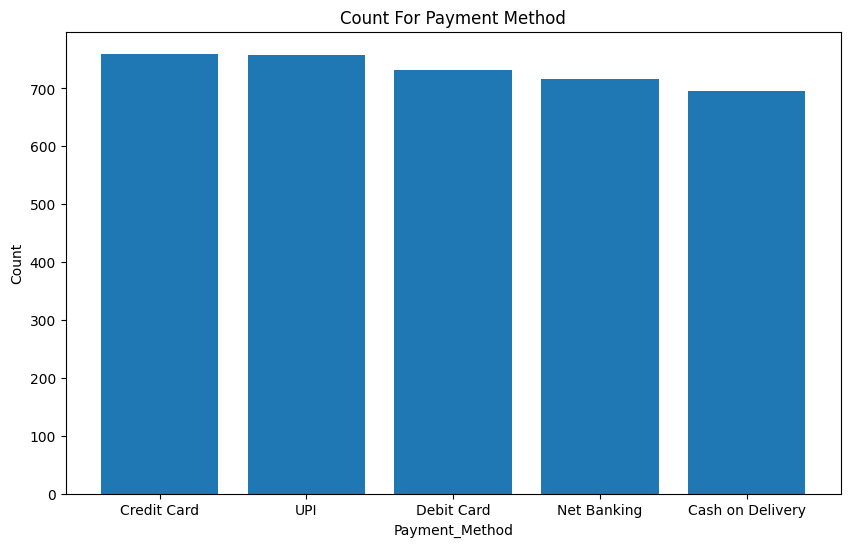

In [97]:
plt.figure(figsize=(10,6)) #Bar graph for count for Payment method.
plt.bar(Payment_Method_counts.index,Payment_Method_counts.values)
plt.xlabel('Payment_Method')
plt.ylabel('Count')
plt.title('Count For Payment Method')
plt.show()

Cash on delivery orders are less as compared to the orders with payment method of Credit card, UPI, Debit card and followed by Net banking.

In [98]:
Category_count=df['Category'].value_counts() #Total count for each value of Category.
print(Category_count)

Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64


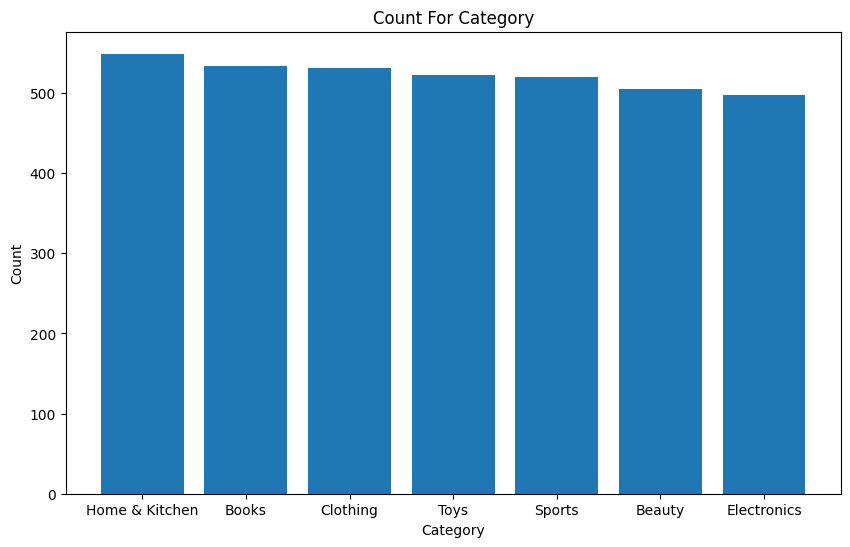

In [99]:
plt.figure(figsize=(10,6)) #Bar graph for count of each category
plt.bar(Category_count.index,Category_count.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count For Category')
plt.show()

Total sale is maximum for the Home & Kitchen, followed by Books, Clothing, etc..

In [100]:
Discount_by_category=df.groupby('Category')["Discount (%)"].mean() #Average discount for each category value.

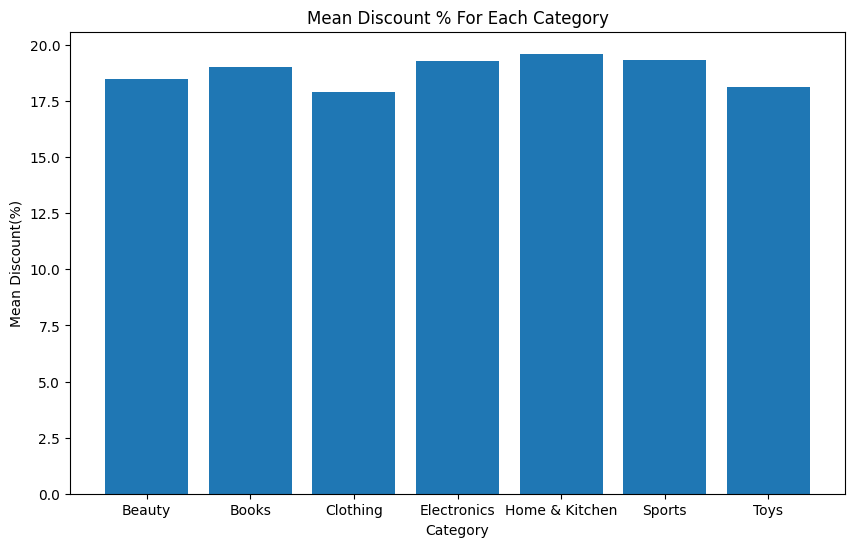

In [101]:
plt.figure(figsize=(10,6)) #Bar graph for average discount of each category value.
plt.bar(Discount_by_category.index,Discount_by_category.values)
plt.xlabel('Category')
plt.ylabel('Mean Discount(%)')
plt.title("Mean Discount % For Each Category")
plt.show()

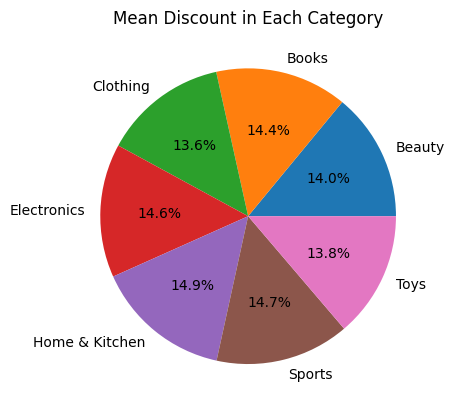

In [102]:
plt.pie(Discount_by_category,labels=Discount_by_category.index,autopct='%1.1f%%') #Pie chart for distribtuion of discount for each category
plt.title("Mean Discount in Each Category")
plt.show()

In [103]:
Sale_for_Category=df.groupby('Category')['Final_Price(Rs.)'].sum() #Total sale for each value of Category
# Showing total sale from each category

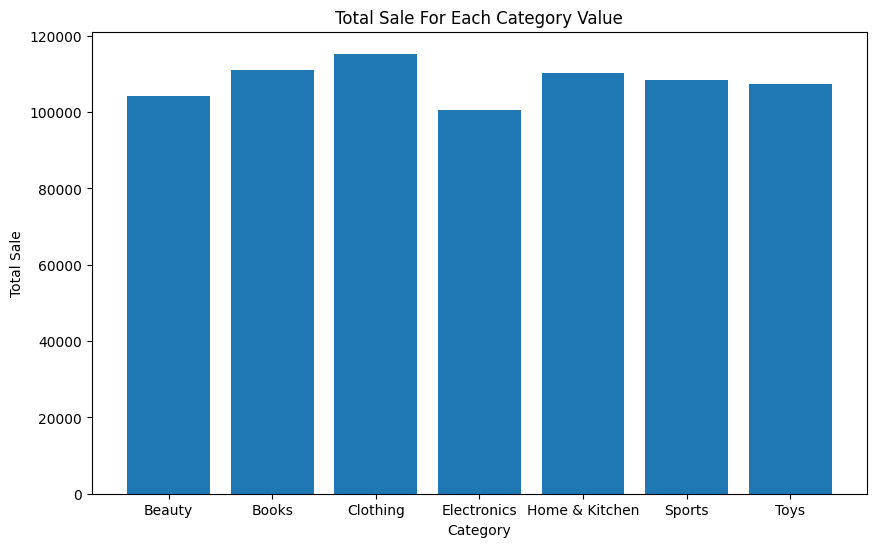

In [104]:
plt.figure(figsize=(10,6)) #Bar graph for Sale to Category
plt.bar(Sale_for_Category.index,Sale_for_Category.values)
plt.xlabel('Category')
plt.ylabel('Total Sale')
plt.title('Total Sale For Each Category Value')
plt.show()

Total Sale amount is highest for Clothing, followed by books, Home & kitchen etc..

In [105]:
df['Year']=pd.DatetimeIndex(df['Purchase_Date']).year #Adding the year column using Date
df['Month']=pd.DatetimeIndex(df['Purchase_Date']).month #Adding the month column using Date

In [106]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,Year,Month
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024,2024,12
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024,2024,9
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024,2024,1
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024,2024,1
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024,2024,9


In [107]:
df['Year'].describe() #Data is given for year 2024 only.

count    3660.0
mean     2024.0
std         0.0
min      2024.0
25%      2024.0
50%      2024.0
75%      2024.0
max      2024.0
Name: Year, dtype: float64

In [108]:
print(df.dtypes) #Data type for each column variables.

User_ID              object
Product_ID           object
Category             object
Price (Rs.)         float64
Discount (%)          int64
Final_Price(Rs.)    float64
Payment_Method       object
Purchase_Date        object
Year                  int32
Month                 int32
dtype: object


In [109]:
df['Month']=df['Month'].astype(object,errors='ignore')#Changing the datatype  of month from int to object
print(df.dtypes)

User_ID              object
Product_ID           object
Category             object
Price (Rs.)         float64
Discount (%)          int64
Final_Price(Rs.)    float64
Payment_Method       object
Purchase_Date        object
Year                  int32
Month                object
dtype: object


In [110]:
df['Month'].unique() #Unique values for each month value

array([12, 9, 1, 8, 3, 5, 2, 11, 10, 6, 4, 7], dtype=object)

In [111]:
Month_map={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['Month']=df['Month'].replace(Month_map) #Replacing the month-values with the name of months.

In [112]:
df['Month'].unique()

array(['Dec', 'Sep', 'Jan', 'Aug', 'Mar', 'May', 'Feb', 'Nov', 'Oct',
       'Jun', 'Apr', 'Jul'], dtype=object)

In [113]:
Sale_for_Month=df.groupby('Month')['Final_Price(Rs.)'].sum()
print(Sale_for_Month)#Total sale for all the months.

Month
Apr    70236.59
Aug    70388.97
Dec    24882.30
Feb    69888.88
Jan    65083.75
Jul    74258.42
Jun    53052.16
Mar    66464.73
May    69939.08
Nov    52834.17
Oct    72279.40
Sep    67969.63
Name: Final_Price(Rs.), dtype: float64


In [114]:
Month_sort=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month'] = pd.Categorical(df['Month'], categories=Month_sort, ordered=True)
df = df.sort_values('Month') #Sorting the months into order

In [115]:
df['Month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

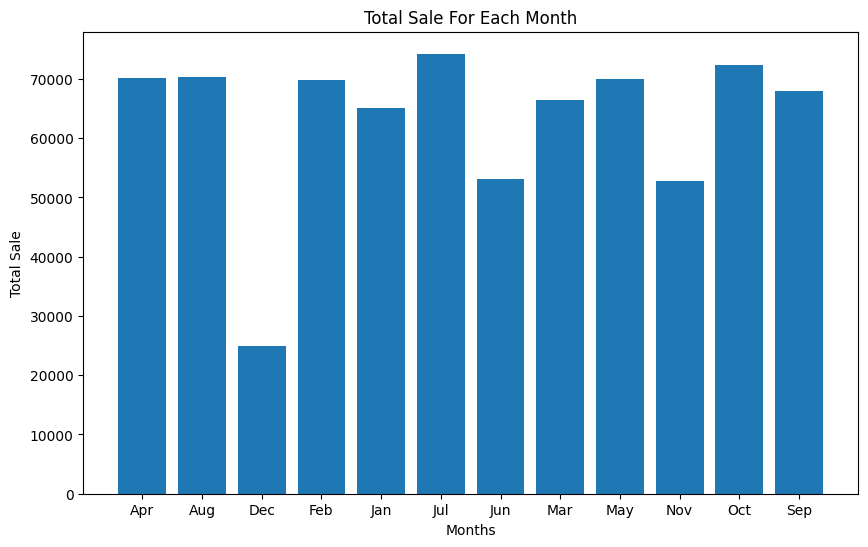

In [116]:
plt.figure(figsize=(10,6)) # Bar graph for total sale for each month
plt.bar(Sale_for_Month.index,Sale_for_Month.values)
plt.xlabel('Months')
plt.ylabel('Total Sale')
plt.title('Total Sale For Each Month')
plt.show() 

#Sales for the month of December is signficantly low.

In [117]:
Aggregated_count= df.groupby(['Month', 'Category']).size().unstack(fill_value=0) #Counting the values for two columns

/tmp/ipykernel_24/1561073578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Aggregated_count= df.groupby(['Month', 'Category']).size().unstack(fill_value=0) #Counting the values for two columns


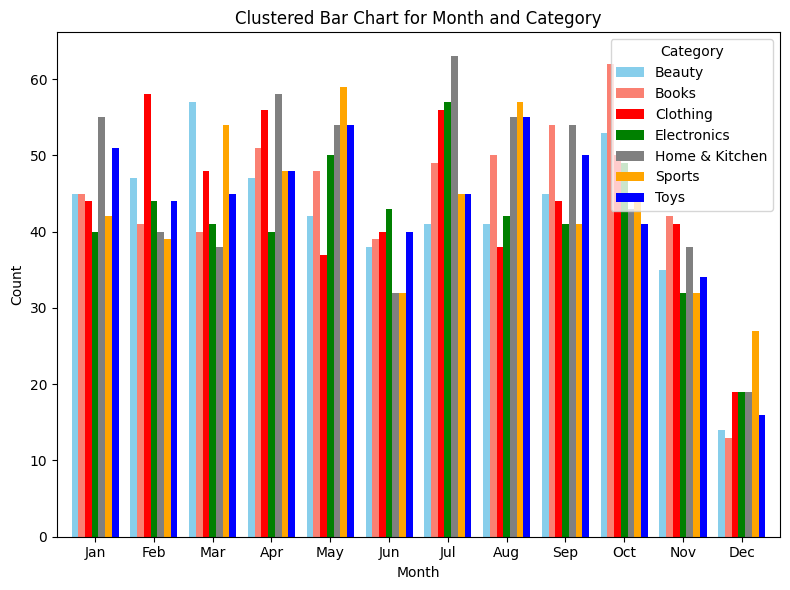

In [118]:
Aggregated_count.plot(kind='bar', figsize=(8, 6), color=['skyblue','salmon','red','green','grey','orange','blue'], width=0.8)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Clustered Bar Chart for Month and Category')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

* For the Month of January : Maximun sale is for Home & Kitchen Products
* For the Month of Feburary: Maximum sale is for Clothing
* For the Month of March: Maximum sale is for Beauty products.
* For the Month of April : Maximum sale is for Home & Kitchen products.
* For the Month of May: Maximum sale is for Sport products.
* For the Month of June: Maximum sale is for Electronic items
* For the Month of July : Maximum sale is for Home & Kitchen products.
* For the Month of August: Maximum sale is for Sport products.
* For the Month of September: Maximum sale is for Books and Home & kichen products both.
* For the Month of October: Maximum sale is for Books.
* For the Month of November: Maximum sale is for Books.
* For the Month of December: Maximum sale is for Sport items.

In [119]:
Average_discount_by_category=df.groupby('Category')['Discount (%)'].mean()
print(Average_discount_by_category)

Category
Beauty            18.475248
Books             19.035581
Clothing          17.919021
Electronics       19.267068
Home & Kitchen    19.608379
Sports            19.326923
Toys              18.126195
Name: Discount (%), dtype: float64


Average discount is between 15-20% approximately.

In [120]:
Max_discount_by_category=df.groupby('Category')['Discount (%)'].max()
print(Max_discount_by_category)

Category
Beauty            50
Books             50
Clothing          50
Electronics       50
Home & Kitchen    50
Sports            50
Toys              50
Name: Discount (%), dtype: int64


Maximum discount is 50% for all the type of products.

In [121]:
Payment_Method_by_Months=df.groupby(['Month', 'Payment_Method']).size().unstack(fill_value=0)

/tmp/ipykernel_24/2470142118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Payment_Method_by_Months=df.groupby(['Month', 'Payment_Method']).size().unstack(fill_value=0)


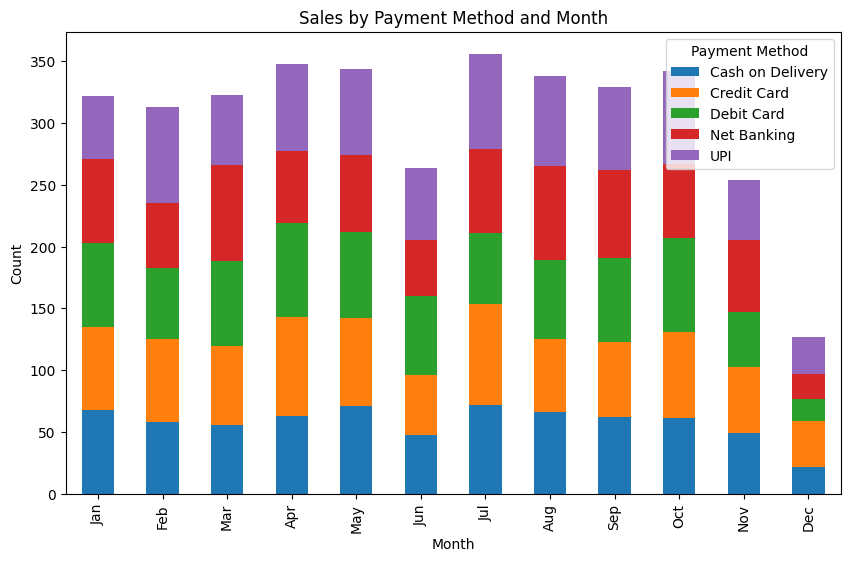

In [122]:
Payment_Method_by_Months.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Sales by Payment Method and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.show()

Payment Method has no variation among the months.